# Example Usage of ForecastingTask

In [1]:
from forecasting_library.datasets import load_caiso_data
from forecasting_library.forecasting.forecasting_task import ForecastingTask, ForecastingTaskData
import pandas as pd

### Load Data

In [2]:
data = load_caiso_data()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31367 entries, 2020-01-01 00:00:00-08:00 to 2023-07-30 23:00:00-07:00
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CAISO_system_load                         31367 non-null  float64
 1   temp_forecast_dayahead_bakersfield        31332 non-null  float64
 2   temp_forecast_dayahead_los_angeles        31332 non-null  float64
 3   temp_forecast_dayahead_san_francisco      31332 non-null  float64
 4   dewpoint_forecast_dayahead_bakersfield    31355 non-null  float64
 5   dewpoint_forecast_dayahead_los_angeles    31355 non-null  float64
 6   dewpoint_forecast_dayahead_san_francisco  31355 non-null  float64
dtypes: float64(7)
memory usage: 1.9 MB


In [3]:
data.interpolate(limit=4).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31367 entries, 2020-01-01 00:00:00-08:00 to 2023-07-30 23:00:00-07:00
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CAISO_system_load                         31367 non-null  float64
 1   temp_forecast_dayahead_bakersfield        31336 non-null  float64
 2   temp_forecast_dayahead_los_angeles        31336 non-null  float64
 3   temp_forecast_dayahead_san_francisco      31336 non-null  float64
 4   dewpoint_forecast_dayahead_bakersfield    31359 non-null  float64
 5   dewpoint_forecast_dayahead_los_angeles    31359 non-null  float64
 6   dewpoint_forecast_dayahead_san_francisco  31359 non-null  float64
dtypes: float64(7)
memory usage: 1.9 MB


### Define Task

In [4]:
task_data = ForecastingTaskData(
    data=data,
    datetime_column="index",
    lagged_features=[c for c in data if c != "CAISO_system_load"],
    feature_lags=[1,2],
    target_col="CAISO_system_load",
    target_lags=[48,72]
)

In [5]:
xgb_task = ForecastingTask(task_data)

### Preprocess Task Data

In [6]:
xgb_task.preprocess_data()
xgb_task.data_preprocessed.head()

,CAISO_system_load,temp_forecast_dayahead_bakersfield,temp_forecast_dayahead_los_angeles,temp_forecast_dayahead_san_francisco,dewpoint_forecast_dayahead_bakersfield,dewpoint_forecast_dayahead_los_angeles,dewpoint_forecast_dayahead_san_francisco,hour,day_of_week,month,...,temp_forecast_dayahead_san_francisco_lag_1,temp_forecast_dayahead_san_francisco_lag_2,dewpoint_forecast_dayahead_bakersfield_lag_1,dewpoint_forecast_dayahead_bakersfield_lag_2,dewpoint_forecast_dayahead_los_angeles_lag_1,dewpoint_forecast_dayahead_los_angeles_lag_2,dewpoint_forecast_dayahead_san_francisco_lag_1,dewpoint_forecast_dayahead_san_francisco_lag_2,CAISO_system_load_lag_48,CAISO_system_load_lag_72
interval_start_time,,,,,,,,,,,,,,,,,,,,,
2020-01-04 02:00:00-08:00,19673.0,45.3,55.3,51.7,42.0,50.7,45.3,2,5,1,...,52.0,52.3,43.0,43.7,53.0,53.0,46.0,46.0,19117.0,20351.0
2020-01-04 03:00:00-08:00,19538.0,44.7,54.7,51.3,41.0,48.3,44.7,3,5,1,...,51.7,52.0,42.0,43.0,50.7,53.0,45.3,46.0,19234.0,20064.0
2020-01-04 04:00:00-08:00,19825.0,44.0,54.0,51.0,40.0,46.0,44.0,4,5,1,...,51.3,51.7,41.0,42.0,48.3,50.7,44.7,45.3,19993.0,20016.0
2020-01-04 05:00:00-08:00,20515.0,43.3,53.3,51.3,40.3,46.3,45.0,5,5,1,...,51.0,51.3,40.0,41.0,46.0,48.3,44.0,44.7,21295.0,20342.0
2020-01-04 06:00:00-08:00,21407.0,42.7,52.7,51.7,40.7,46.7,46.0,6,5,1,...,51.3,51.0,40.3,40.0,46.3,46.0,45.0,44.0,23122.0,20734.0


### Split Train/Test Data

In [7]:
xgb_task.split_train_test(test_size=8760)
print(xgb_task.X_train.shape, xgb_task.X_test.shape, xgb_task.y_train.shape, xgb_task.y_test.shape)

(22490, 23) (8760, 23) (22490,) (8760,)


### Train Model 

In [8]:
xgb_task.set_model(model_type="xgboost")

In [9]:
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [3, 6],
    "learning_rate": [0.01, 0.1],
    "subsample": [0.8, 1.0],
}
xgb_task.train_model(param_grid, n_splits=5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}


### Run Forecast

In [10]:
xgb_task.forecast(xgb_task.X_test.iloc[:14*24])

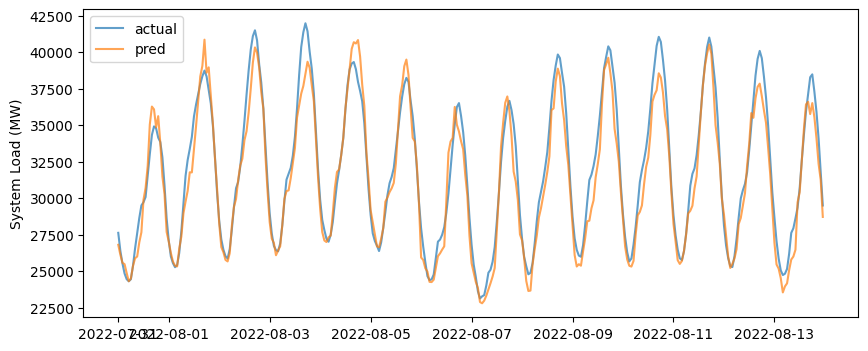

In [11]:
xgb_task.plot_actual_v_pred(
    y_actual=xgb_task.y_test.iloc[:14*24],
    y_pred=xgb_task.y_forecast
)

### Run Backtesting
Runs 30 (n_splits) separate 24-hour (test_size) forecasts simulating a month of Day ahead forecasts where each day's (D+1) forecast is trained on all training history from day D and earlier. 

In [12]:
xgb_task.backtest_model(
    X=xgb_task.X,
    y=xgb_task.y,
    n_splits=30,
    test_size=24,
)

In [13]:
import numpy as np
average_mape = np.mean([r["MAPE"] for r in xgb_task.backtest_results])
average_mae = np.mean([r["MAE"] for r in xgb_task.backtest_results])
print(f"Average Mean Absolute Percent Error (MAPE) during backtesting: {100*average_mape:.2f}%")
print(f"Average Mean Absolute Error (MAE) during backtesting: {average_mae:.0f} MW")

Average Mean Absolute Percent Error (MAPE) during backtesting: 4.01%
Average Mean Absolute Error (MAE) during backtesting: 1196 MW


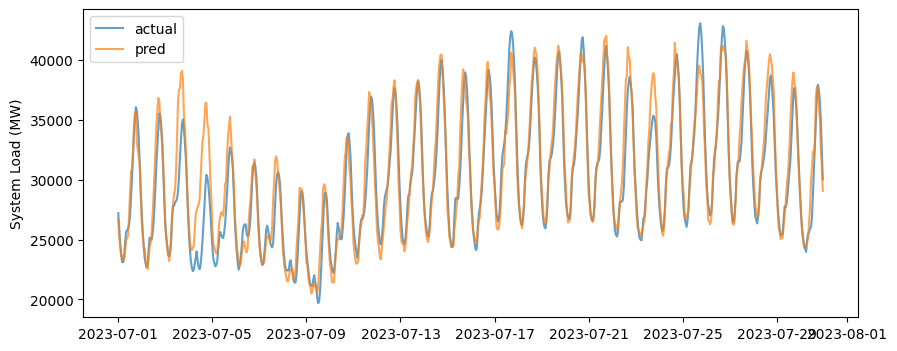

In [14]:
xgb_task.plot_actual_v_pred(
    y_actual=xgb_task.y[-len(xgb_task.y_backtest):],
    y_pred=xgb_task.y_backtest
)

### Develop two models and compare their performance
#### Compare Linear and XGBoost Models on a 1 year Backtest
Using the following task inputs:
- feature lags of 1, 2, 3, 4 hours were used on the forecasted weather variables to account for the effects of thermal capacitance on heating/cooling loads
- target lags of 38, 48 and 72 hours were used to capture recent trends of the target for the same time of day. 

In [29]:
comparison_task_data = ForecastingTaskData(
    data=data,
    datetime_column="index",
    lagged_features=[c for c in data if c != "CAISO_system_load"],
    feature_lags=[1,2,3,4],
    target_col="CAISO_system_load",
    target_lags=[38, 48, 72]
)
TEST_DAYS = 365

In [30]:
xgb_task = ForecastingTask(comparison_task_data)
xgb_task.preprocess_data()
xgb_task.split_train_test(test_size=8760)
xgb_task.set_model("xgboost")
xgb_task.train_model(
    param_grid = {
        "n_estimators": [50, 100],
        "max_depth": [3, 6],
        "learning_rate": [0.01, 0.1],
        "subsample": [0.8, 1.0],
    },
    n_splits=5
)
xgb_task.backtest_model(
    X=xgb_task.X,
    y=xgb_task.y,
    n_splits=TEST_DAYS,
    test_size=24,
)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}


Average Mean Absolute Percent Error (MAPE) during backtesting: 3.31%
Average Mean Absolute Error (MAE) during backtesting: 850 MW


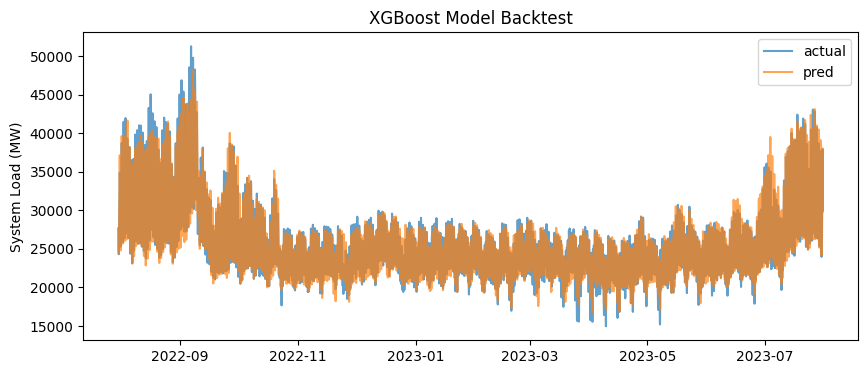

In [31]:
import numpy as np
xgb_average_mape = np.mean([r["MAPE"] for r in xgb_task.backtest_results])
xgb_average_mae = np.mean([r["MAE"] for r in xgb_task.backtest_results])
print(f"Average Mean Absolute Percent Error (MAPE) during backtesting: {100*xgb_average_mape:.2f}%")
print(f"Average Mean Absolute Error (MAE) during backtesting: {xgb_average_mae:.0f} MW")
xgb_task.plot_actual_v_pred(
    y_actual=xgb_task.y[-len(xgb_task.y_backtest):],
    y_pred=xgb_task.y_backtest,
    title="XGBoost Model Backtest"
)

#### Set Up and Run Linear Task

In [32]:
lin_task = ForecastingTask(comparison_task_data)
lin_task.preprocess_data()
lin_task.split_train_test(test_size=8760)
lin_task.set_model("linear")
lin_task.train_model()
lin_task.backtest_model(
    X=lin_task.X,
    y=lin_task.y,
    n_splits=TEST_DAYS,
    test_size=24
)

Average Mean Absolute Percent Error (MAPE) during backtesting: 5.58%
Average Mean Absolute Error (MAE) during backtesting: 1411 MW


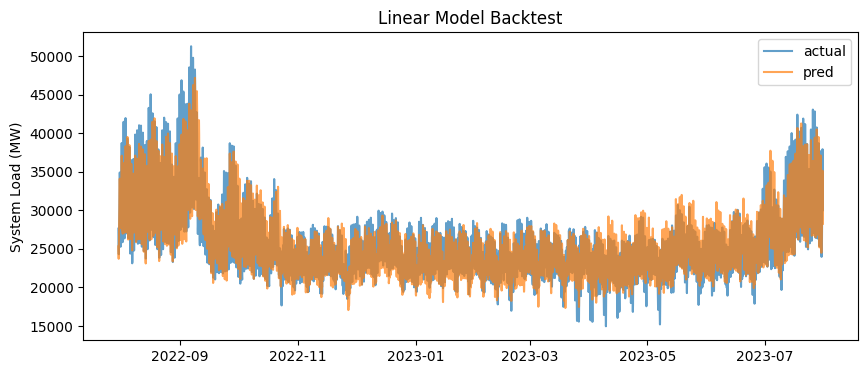

In [33]:
import numpy as np
lin_average_mape = np.mean([r["MAPE"] for r in lin_task.backtest_results])
lin_average_mae = np.mean([r["MAE"] for r in lin_task.backtest_results])
print(f"Average Mean Absolute Percent Error (MAPE) during backtesting: {100*lin_average_mape:.2f}%")
print(f"Average Mean Absolute Error (MAE) during backtesting: {lin_average_mae:.0f} MW")
xgb_task.plot_actual_v_pred(
    y_actual=xgb_task.y[-len(lin_task.y_backtest):],
    y_pred=lin_task.y_backtest,
    title="Linear Model Backtest"
)

In [34]:
y_actual = xgb_task.y[-len(lin_task.y_backtest):]
actual_peak = y_actual.max()
xgb_pred_at_peak = xgb_task.y_backtest.loc[y_actual.idxmax()]
lin_pred_at_peak = lin_task.y_backtest.loc[y_actual.idxmax()]
print(f"Actual Peak: {actual_peak:.0f} MW, XGBoost Pred at Peak: {xgb_pred_at_peak:.0f} MW, Linear Pred at Peak: {lin_pred_at_peak:.0f} MW")
xgb_peak_pct_diff = (xgb_pred_at_peak-actual_peak)/actual_peak*100
lin_peak_pct_diff = (lin_pred_at_peak-actual_peak)/actual_peak*100
print(f"XGB Peak % diff: {xgb_peak_pct_diff:.2f}%, Linear Peak % Diff: {lin_peak_pct_diff:.2f}%")

Actual Peak: 51292 MW, XGBoost Pred at Peak: 43775 MW, Linear Pred at Peak: 42972 MW
XGB Peak % diff: -14.66%, Linear Peak % Diff: -16.22%


### Comparison Analysis 

In [35]:
print(f"- The XGBoost model with hyperparameter tuning performs with higher accuracy by MAE and MAPE than the linear model for a 1-year backtest")
print(f"- XGBoost has a {(1- (xgb_average_mae/lin_average_mae))*100:.0f}% MAE than the linear model.") 
print(f"- XGB also outperforms the linear model in the peak load prediction indicating XGB is more accurate on extreme days.")
print(f"- XGB underpredicted the peak by {-xgb_peak_pct_diff:.2f}% and the linear model underpredicted the peak by {-lin_peak_pct_diff:.2f}%")

- The XGBoost model with hyperparameter tuning performs with higher accuracy by MAE and MAPE than the linear model for a 1-year backtest
- XGBoost has a 40% MAE than the linear model.
- XGB also outperforms the linear model in the peak load prediction indicating XGB is more accurate on extreme days.
- XGB underpredicted the peak by 14.66% and the linear model underpredicted the peak by 16.22%


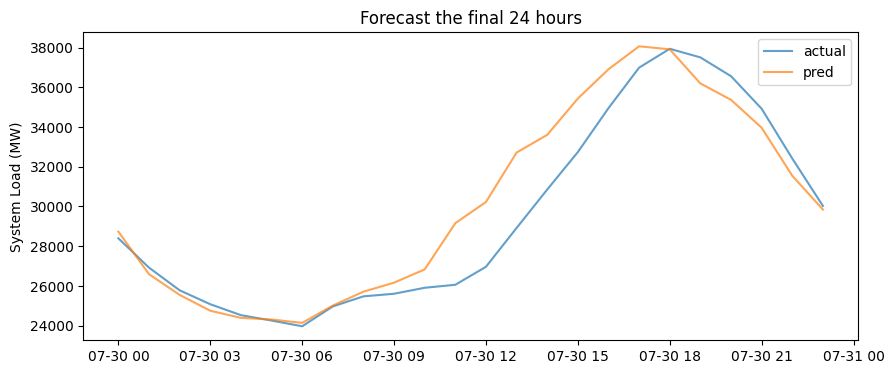

In [36]:
xgb_task.split_train_test(test_size=24)
xgb_task.backtest_model(
    X=xgb_task.X,
    y=xgb_task.y,
    n_splits=2,
    test_size=24
)
xgb_task.plot_actual_v_pred(
    y_actual=xgb_task.y[-24:],
    y_pred=xgb_task.y_backtest[-24:],
    title="Forecast the final 24 hours"
)

### General analysis 
Based on the above backtesting on the final full year of data to represent all season, the following general performance can be expected for the hyper-parameter tuned XGBoost model:

In [37]:
print(f"- Average Mean Absolute Percent Error (MAPE) during backtesting: {100*xgb_average_mape:.2f}%") 
print(f"- Average Mean Absolute Error (MAE) during backtesting: {xgb_average_mae:.0f} MW")

- Average Mean Absolute Percent Error (MAPE) during backtesting: 3.31%
- Average Mean Absolute Error (MAE) during backtesting: 850 MW
